In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df=pd.read_csv("dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
df.dropna(subset=["artists", "album_name", "track_name"], inplace=True)



In [ ]:
df = df.astype({
    "track_id": "string",
    "artists": "string",
    "album_name": "string",
    "track_name": "string",
    "track_genre": "string"
})



In [ ]:
df=df[df["duration_ms"] > 0]


In [ ]:
df=df[df["popularity"].between(0, 100)]


In [ ]:
df=df[df["tempo"] > 0]


In [ ]:
df=df[df["loudness"].between(-60, 0)]


In [ ]:
audio_cols = [
    "danceability", "energy", "speechiness",
    "acousticness", "instrumentalness",
    "liveness", "valence"
]

for col in audio_cols:
    df=df[df[col].between(0, 1)]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113752 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113752 non-null  int64  
 1   track_id          113752 non-null  string 
 2   artists           113752 non-null  string 
 3   album_name        113752 non-null  string 
 4   track_name        113752 non-null  string 
 5   popularity        113752 non-null  int64  
 6   duration_ms       113752 non-null  int64  
 7   explicit          113752 non-null  bool   
 8   danceability      113752 non-null  float64
 9   energy            113752 non-null  float64
 10  key               113752 non-null  int64  
 11  loudness          113752 non-null  float64
 12  mode              113752 non-null  int64  
 13  speechiness       113752 non-null  float64
 14  acousticness      113752 non-null  float64
 15  instrumentalness  113752 non-null  float64
 16  liveness          113752 

In [ ]:
df.to_csv("clean_music_data.csv", index=False)
print("Data cleaning complete")

Data cleaning complete


In [ ]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


In [ ]:
df.shape

(113752, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113752 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113752 non-null  int64  
 1   track_id          113752 non-null  string 
 2   artists           113752 non-null  string 
 3   album_name        113752 non-null  string 
 4   track_name        113752 non-null  string 
 5   popularity        113752 non-null  int64  
 6   duration_ms       113752 non-null  int64  
 7   explicit          113752 non-null  bool   
 8   danceability      113752 non-null  float64
 9   energy            113752 non-null  float64
 10  key               113752 non-null  int64  
 11  loudness          113752 non-null  float64
 12  mode              113752 non-null  int64  
 13  speechiness       113752 non-null  float64
 14  acousticness      113752 non-null  float64
 15  instrumentalness  113752 non-null  float64
 16  liveness          113752 

In [ ]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113752.000000,113752.000000,1.137520e+05,113752.000000,113752.000000,113752.000000,113752.000000,113752.000000,113752.000000,113752.000000,113752.000000,113752.000000,113752.000000,113752.000000,113752.000000
mean,56955.137422,33.232488,2.281228e+05,0.567613,0.641858,5.309753,-8.246933,0.637554,0.084686,0.314830,0.155342,0.213156,0.474794,122.300197,3.909443
std,32897.300410,22.318278,1.063297e+05,0.172348,0.250738,3.559627,4.989283,0.480709,0.105688,0.332389,0.308884,0.189911,0.258835,29.645687,0.407922
min,0.000000,0.000000,1.580000e+04,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000,0.000000
25%,28469.750000,17.000000,1.741980e+05,0.456000,0.473000,2.000000,-10.004000,0.000000,0.035900,0.016900,0.000000,0.097900,0.261000,99.405500,4.000000
50%,56947.500000,34.000000,2.130000e+05,0.580000,0.685000,5.000000,-7.001000,1.000000,0.048900,0.169000,0.000041,0.132000,0.464000,122.022000,4.000000
75%,85414.250000,50.000000,2.615900e+05,0.695000,0.854000,8.000000,-5.005000,1.000000,0.084500,0.597000,0.047625,0.273000,0.683000,140.072250,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,-0.001000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df["track_id"].nunique()

89515

In [ ]:
df["track_genre"].value_counts().head()

,count
track_genre,
acoustic,1000
afrobeat,1000
alt-rock,1000
alternative,1000
bluegrass,1000


In [67]:
df["popularity"].mean()

np.float64(33.23248821998734)

In [68]:
import matplotlib.pyplot as plt

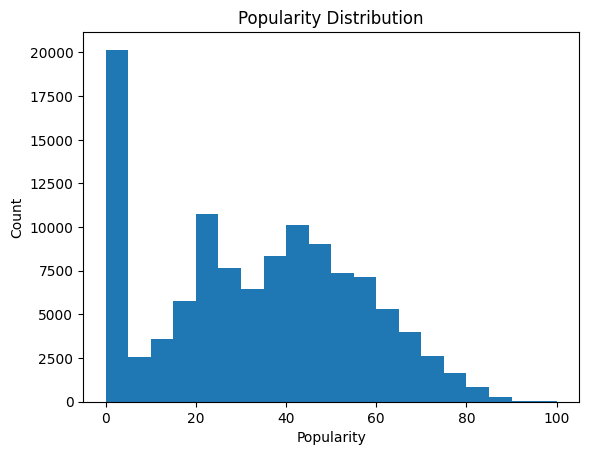

In [69]:
plt.hist(df["popularity"], bins=20)
plt.title("Popularity Distribution")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()


In [ ]:
df.groupby("track_genre")["popularity"].mean().head()


,popularity
track_genre,
acoustic,42.483000
afrobeat,24.399000
alt-rock,33.943000
alternative,24.337000
ambient,44.151454


In [ ]:
df[["popularity", "energy", "danceability"]].corr()


,popularity,energy,danceability
popularity,1.00000,0.001470,0.036480
energy,0.00147,1.000000,0.126767
danceability,0.03648,0.126767,1.000000
